In [127]:
# TASK 1: Import the required libraries '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
# TASK 2: Read, Pre-Process and print the main statistics about the dataset.
# Here using diamond.csv datasets
diamond_df = pd.read_csv('diamond.csv')

diamond_statistics = diamond_df.describe()

print(f"Diamond Statistics:\n{diamond_statistics}")

# Get the shape of the dataset
num_samples, num_features = diamond_df.shape
print(f"\nNumber of samples: {num_samples}, Number of features: {num_features}")


Diamond Statistics:
       average us salary  number of diamonds mined (millions)
count       53940.000000                         53940.000000
mean        39521.990100                             2.902669
std          5486.892971                             1.325985
min         30000.000000                             0.600000
25%         34780.000000                             1.750000
50%         39547.500000                             2.910000
75%         44252.000000                             4.050000
max         48999.000000                             5.200000

Number of samples: 53940, Number of features: 13


In [131]:
# TASK 2. Handling the missing value by determining the size of datasets and missing values

# fetching the number of rows
diamond_rows = diamond_df.shape[0]

# calculating missing counts in one column
diamond_missing_count = diamond_df.isnull().sum()

# fetching number of missing data in each column which will help to decide in which column do we need to either drop or fill missing values
print(f"Diamond missing data :\n{diamond_missing_count}")

diamond_missing_total_count = diamond_missing_count.sum()

# calculating the percentage of missing value
diamond_missing_percentage = (diamond_missing_total_count / diamond_rows) * 100

print(f"Diamond_total_missing%: {diamond_missing_percentage}")

Diamond missing data :
Unnamed: 0                              377
carat                                  1510
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                   694
table                                  1542
price                                  1583
x                                      1526
y                                      1221
z                                      1433
dtype: int64
Diamond_total_missing%: 24.18242491657397


In [149]:
# Handling the missing value by replacing the value because missing percentage is high and dropping the values will not be efficient
# using mean() for numerical data and mode() for categorical data to replace the missing value
diamond_df['carat'] = pd.to_numeric(diamond_df['carat'], errors='coerce')
diamond_df['depth'] = pd.to_numeric(diamond_df['depth'], errors='coerce')
diamond_df['table'] = pd.to_numeric(diamond_df['table'], errors='coerce')
diamond_df['price'] = pd.to_numeric(diamond_df['price'], errors='coerce')
diamond_df['x'] = pd.to_numeric(diamond_df['x'], errors='coerce')
diamond_df['y'] = pd.to_numeric(diamond_df['y'], errors='coerce')
diamond_df['z'] = pd.to_numeric(diamond_df['z'], errors='coerce')


diamond_df['carat'] = diamond_df['carat'].fillna(diamond_df['carat'].mean())
diamond_df['cut'] = diamond_df['cut'].fillna(diamond_df['cut'].mode()[0])
diamond_df['color'] = diamond_df['color'].fillna(diamond_df['color'].mode()[0])
diamond_df['clarity'] = diamond_df['clarity'].fillna(diamond_df['clarity'].mode()[0])
diamond_df['depth'] = diamond_df['depth'].fillna(diamond_df['depth'].mean())
diamond_df['table'] = diamond_df['table'].fillna(diamond_df['table'].mean())
diamond_df['price'] = diamond_df['price'].fillna(diamond_df['price'].mean())
diamond_df['x'] = diamond_df['x'].fillna(diamond_df['x'].mean())
diamond_df['y'] = diamond_df['y'].fillna(diamond_df['y'].mean())

diamond_df = diamond_df.dropna(subset=['Unnamed: 0'])
diamond_df = diamond_df.dropna(subset=['z'])

# calculating missing counts in one column
diamond_missing_count = diamond_df.isnull().sum()

# fetching number of missing data in each column which will help to decide in which column do we need to either drop or fill missing values
print(f"Diamond missing data :\n{diamond_missing_count}")

0
Diamond missing data :
Unnamed: 0                             0
carat                                  0
cut                                    0
color                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64


In [151]:
# TASK 2: Handling mismatched string formats of datasets.
# For this we need to focus on categorical data who are more prone to be inconsistent with cpaitalization

# For 'diamond' categorical data are ('carat', 'cut' and color') but 'carat' is numeric so we only handle 'cut' and 'color'
diamond_df['cut'] = diamond_df['cut'].str.lower()
diamond_df['color'] = diamond_df['color'].str.lower()

In [153]:
#5 Handling outliers for Penguins and Diamond Dataset
# First we're identifying the numerical columns in the datasets
diamond_num_column = diamond_df.select_dtypes(include = ['int64', 'float64']).columns

print(f"\nDiamond Numerical Column: {diamond_num_column}")


Diamond Numerical Column: Index(['carat', 'average us salary', 'number of diamonds mined (millions)',
       'depth', 'table', 'price', 'x', 'y', 'z'],
      dtype='object')


In [194]:
# TASK 2: handling outlier using Inter-Quartile range

def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Removing outliers
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
        
    return df

diamond_new_df = handle_outliers(diamond_df, diamond_num_column)

# Check the shape before and after the outlier handling
print(f"Original_shape: {diamond_df.shape}, After_Outlier_shape: {diamond_new_df.shape}")
diamond_new_df.head(10)

Original_shape: (51337, 13), After_Outlier_shape: (46459, 13)


,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.230000,ideal,e,SI2,31282,5.01,61.500000,55.000000,3.98,3.95,3.98,2.43
1,2,0.210000,premium,e,SI1,40049,1.69,59.800000,61.000000,3.84,3.89,3.84,2.31
3,4,0.290000,premium,i,VS2,38495,3.49,62.400000,58.000000,4.23,4.20,4.23,2.63
4,5,0.310000,good,j,SI2,34178,4.70,63.300000,58.000000,4.35,4.34,4.35,2.75
5,6,0.240000,very good,j,VVS2,44700,0.86,62.800000,57.000000,3.96,3.94,3.96,2.48
6,7,0.240000,very good,i,VVS1,42939,1.68,62.300000,57.000000,3.98,3.95,3.98,2.47
7,8,0.797823,ideal,h,SI1,37587,4.62,61.750175,57.456332,4.11,4.07,4.11,2.53
9,10,0.230000,very good,h,VS1,45506,1.20,59.400000,61.000000,4.05,4.00,4.05,2.39
10,11,0.300000,good,j,SI1,38031,2.63,64.000000,55.000000,4.28,4.25,4.28,2.73
11,12,0.230000,ideal,j,VS1,44410,2.39,62.800000,56.000000,3.90,3.93,3.90,2.46


DataFrame after dropping low-correlation features:
   Unnamed: 0     carat        cut color clarity      table  price     z
0           1  0.230000      ideal     e     SI2  55.000000   3.98  2.43
1           2  0.210000    premium     e     SI1  61.000000   3.84  2.31
3           4  0.290000    premium     i     VS2  58.000000   4.23  2.63
4           5  0.310000       good     j     SI2  58.000000   4.35  2.75
5           6  0.240000  very good     j    VVS2  57.000000   3.96  2.48
6           7  0.240000  very good     i    VVS1  57.000000   3.98  2.47
7           8  0.797823      ideal     h     SI1  57.456332   4.11  2.53
9          10  0.230000  very good     h     VS1  61.000000   4.05  2.39
10         11  0.300000       good     j     SI1  55.000000   4.28  2.73
11         12  0.230000      ideal     j     VS1  56.000000   3.90  2.46


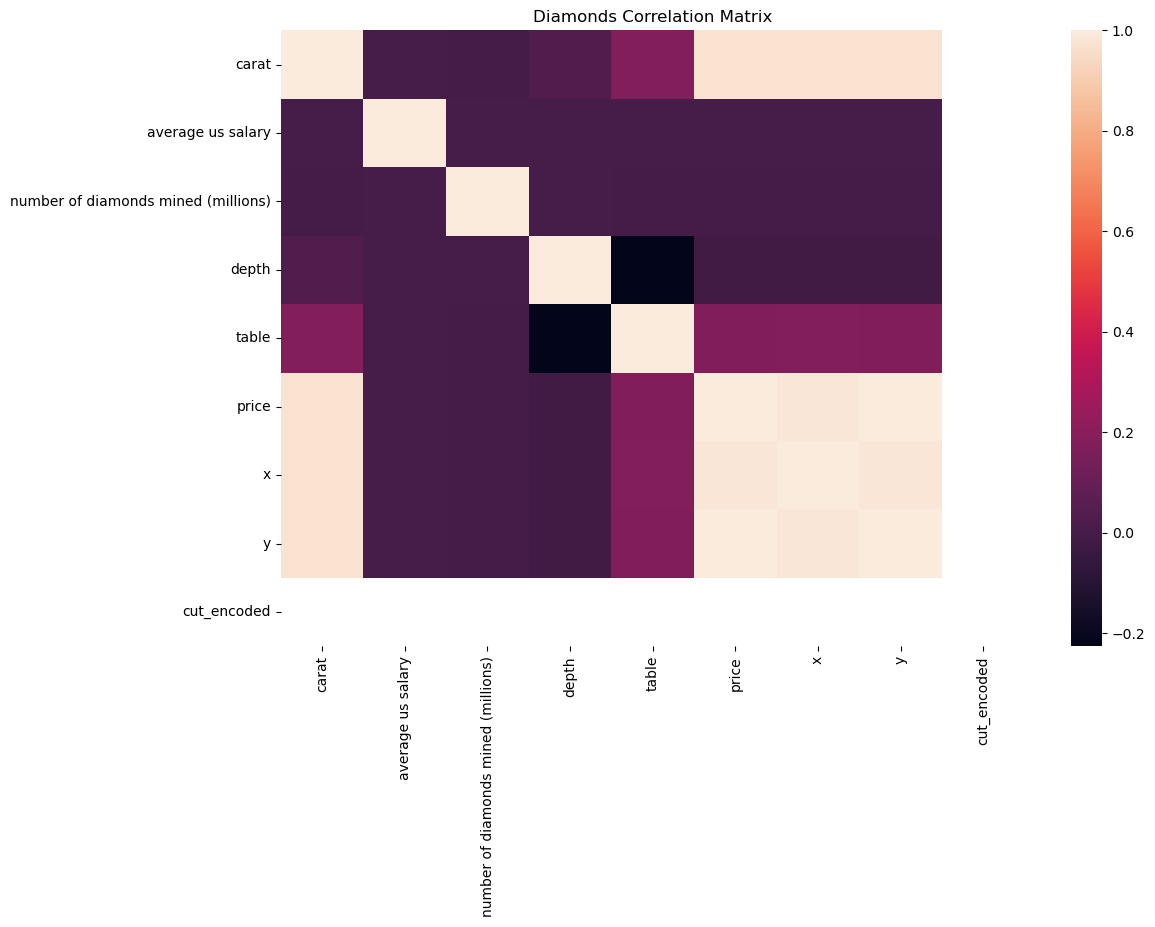

In [196]:
# TASK 2: Identify uncorrelated or unrelated features 'Diamonnd' datasets

diamond_cleaned_df = diamond_new_df.drop(columns=['average us salary', 'number of diamonds mined (millions)', 'depth', 'x', 'y'])

# Displaying the cleaned DataFrame
print("DataFrame after dropping low-correlation features:")
print(diamond_cleaned_df.head(10))

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), fmt=".2f")
plt.title('Diamonds Correlation Matrix')
plt.show()

In [198]:
# Encoding 'cut' to binary (Premium = 1, Other cuts = 0)
diamond_cleaned_df['cut_encoded'] = diamond_cleaned_df['cut'].apply(lambda x: 1 if x == 'Premium' else 0)

# Dropping non-numeric columns
numeric_features = diamond_cleaned_df.drop(columns=['cut', 'color', 'clarity', 'Unnamed: 0', 'z'])

# Step to ensure the 'cut_encoded' column is included
# If you want to compute correlation with 'cut_encoded'
numeric_features['cut_encoded'] = diamond_cleaned_df['cut_encoded']

# Compute the correlation matrix
correlation_matrix = numeric_features.corr()

# Display the correlation matrix
print(correlation_matrix)

                carat     table     price  cut_encoded
carat        1.000000  0.176958  0.969620          NaN
table        0.176958  1.000000  0.172847          NaN
price        0.969620  0.172847  1.000000          NaN
cut_encoded       NaN       NaN       NaN          NaN


In [200]:
diamond_cat_df = pd.get_dummies(diamond_cleaned_df, columns=['cut', 'color', 'clarity'])
# One-hot encode 'color' and 'clarity'

# Convert the new binary columns to integer type
diamond_cat_df['cut_ideal'] = diamond_cat_df['cut_ideal'].astype(int)
diamond_cat_df['cut_premium'] = diamond_cat_df['cut_premium'].astype(int)
diamond_cat_df['cut_good'] = diamond_cat_df['cut_good'].astype(int)
diamond_cat_df['cut_very good'] = diamond_cat_df['cut_very good'].astype(int)
diamond_cat_df['cut_fair'] = diamond_cat_df['cut_fair'].astype(int)

# Convert boolean columns to integers
diamond_cat_df['cut_false'] = diamond_cat_df['cut_false'].astype(int)
diamond_cat_df['cut_maybe'] = diamond_cat_df['cut_maybe'].astype(int)
diamond_cat_df['cut_true'] = diamond_cat_df['cut_true'].astype(int)

# Display the first 10 rows of the updated DataFrame
diamond_cat_df.head(10)

,Unnamed: 0,carat,table,price,z,cut_encoded,cut_fair,cut_false,cut_good,cut_ideal,...,clarity_VS2,clarity_VVS1,clarity_VVS2,clarity_if,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
0,1,0.230000,55.000000,3.98,2.43,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,2,0.210000,61.000000,3.84,2.31,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,4,0.290000,58.000000,4.23,2.63,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
4,5,0.310000,58.000000,4.35,2.75,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
5,6,0.240000,57.000000,3.96,2.48,0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
6,7,0.240000,57.000000,3.98,2.47,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
7,8,0.797823,57.456332,4.11,2.53,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
9,10,0.230000,61.000000,4.05,2.39,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
10,11,0.300000,55.000000,4.28,2.73,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
11,12,0.230000,56.000000,3.90,2.46,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False


In [254]:
# TASK 3. Data Preparation
# Defining 'Price' as the target variable Y
Y = diamond_cat_df['price'].values

# Creating matrices for input X and target Y
X = diamond_cat_df.drop(columns=['price', 'Unnamed: 0'])

# Converting boolean columns to integers
X = X.astype(int)

# Converting X to NumPy array
X = X.values  # Shape: N x d

# Checking for columns with zero variance
zero_variance_column = np.where(X.std(axis=0) == 0)[0]

if zero_variance_column.size > 0:
    print(f"Removed zero variance columns at indices: {zero_variance_columns}")
    X = np.delete(X, zero_variance_column, axis=1)

#Splitting the dataset into training (80%) and test (20%) sets
np.random.seed(42)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

train_size = int(0.8 * len(indices))
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X[train_indices]
y_train = Y[train_indices]
X_test = X[test_indices]
y_test = Y[test_indices]

# Normalizing after splitting the datasets
def normalize(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0)

    # Avoiding division by zero
    stds[stds == 0] = 1

    return (X - means) / stds

X_train = normalize(X_train)
X_test = normalize(X_test)

# Printing the shapes of X_train, y_train, X_test, y_test
print(f"Shapes of the datasets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")


Removed zero variance columns at indices: [3]
Shapes of the datasets:
X_train: (37167, 39), y_train: (37167,), X_test: (9292, 39), y_test: (9292,)


In [337]:
# Adding a bias term (intercept)
def add_bias(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

X_train_with_bias = add_bias(X_train)
X_test_with_bias = add_bias(X_test)

# Calculating weights w using the OLS equation
def calculate_ols_weights(X, y):
    return np.linalg.inv(X.T @ X) @ (X.T @ y)

w_ols = calculate_ols_weights(X_train_with_bias, y_train)

# predictions
def predict(X, w):
    return X @ w

y_pred_train = predict(X_train_with_bias, w_ols)
y_pred_test = predict(X_test_with_bias, w_ols)

# MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse_train = calculate_mse(y_train, y_pred_train)
mse_test = calculate_mse(y_test, y_pred_test)

#combining datasets
X_combined_with_bias = np.vstack([X_train_with_bias, X_test_with_bias])
y_combined = np.concatenate([y_train, y_test])

# predictions for combined data
y_pred_combined = predict(X_combined_with_bias, w_ols)

# Calculating overall MSE
mse_ols_combined = calculate_mse(y_combined, y_pred_combined)

print(f"MSE (Train): {mse_train}")
print(f"MSE (Test): {mse_test}")
print(f"Overall MSE: {mse_ols_combined}")

MSE (Train): 0.14116911940056304
MSE (Test): 0.20950567251129076
Overall MSE: 0.15483672420275169


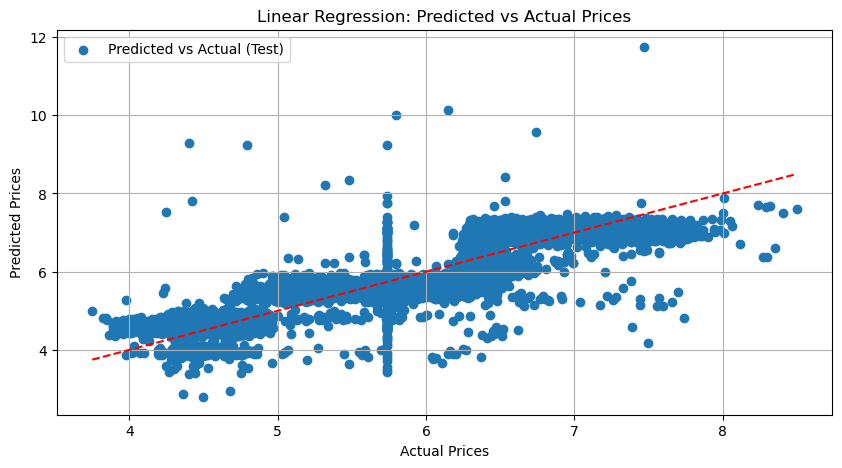

In [339]:
#Plotting Linear Regression (Predictions vs Actual Targets)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, label='Predicted vs Actual (Test)')
plt.title('Linear Regression: Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.legend()
plt.grid()
plt.show()


In [304]:
# 5 Implementing Ridge regression using OLS
# Calculate weights using ridge regression
def calculate_ridge_weights(X, y, lambda_):
    identity_matrix = np.eye(X.shape[1])
    return np.linalg.inv(X.T @ X + lambda_ * identity_matrix) @ (X.T @ y)

# selecting regularization parameter (lambda)
lambda_ = 1.0

# Calculating weights for ridge regression
w_ridge = calculate_ridge_weights(X_train_with_bias, y_train, lambda_)

# predictions for ridge regression
y_pred_ridge_train = predict(X_train_with_bias, w_ridge)
y_pred_ridge_test = predict(X_test_with_bias, w_ridge)

# MSE for training and test sets
mse_ridge_train = calculate_mse(y_train, y_pred_ridge_train)
mse_ridge_test = calculate_mse(y_test, y_pred_ridge_test)

# combining datasets
X_combined_with_bias = np.vstack([X_train_with_bias, X_test_with_bias])
y_combined = np.concatenate([y_train, y_test])

# predictions for combined data
y_pred_ridge_combined = predict(X_combined_with_bias, w_ridge)

# Calculating overall MSE
mse_ridge_combined = calculate_mse(y_combined, y_pred_ridge_combined)

print(f"MSE Ridge (Train): {mse_ridge_train}")
print(f"MSE Ridge (Test): {mse_ridge_test}")
print(f"Overall MSE Ridge: {mse_ridge_combined}")



MSE Ridge (Train): 0.1372489119034278
MSE Ridge (Test): 0.13801853880775744
Overall MSE Ridge: 0.13740284059743824


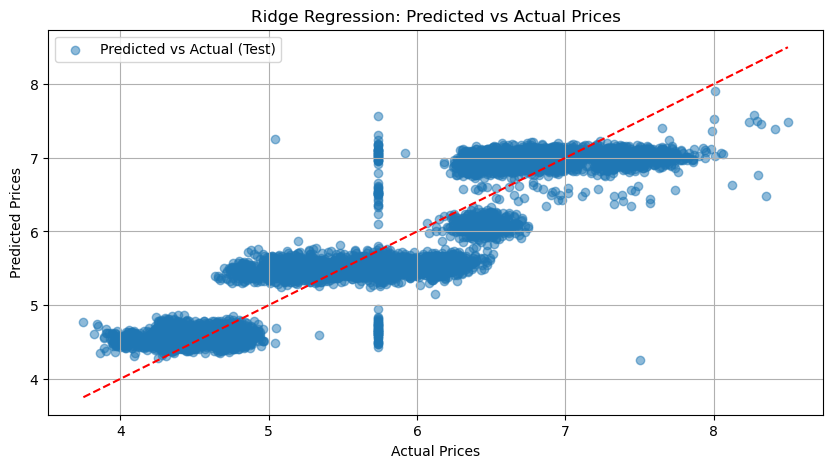

In [333]:
# Plotting for Ridge Regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_ridge_test, alpha=0.5, label='Predicted vs Actual (Test)')
plt.title('Ridge Regression: Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.legend()
plt.grid()
plt.show()

In [341]:
# Comparing and saving the best model based
import pickle
if mse_train < mse_ridge_train:
    best_model = 'OLS'
    best_weights = w_ols
else:
    best_model = 'Ridge'
    best_weights = w_ridge

print(f"Best_Model: {best_model}")

# Saving the best weights to a pickle file
with open('gsingh55_smituple_assignment1_part3.pickle', 'wb') as file:
    pickle.dump(best_weights, file)

Best_Model: Ridge


In [343]:
# Open the .pickle file in read-binary mode
with open('gsingh55_smituple_assignment1_part3.pickle', 'rb') as file:
    # Load the content of the file
    model = pickle.load(file)

# View or inspect the loaded model
print(model)

[ 5.61090406e+00  2.47215174e-01  5.43608989e-02  6.98528739e-01
 -9.17122622e-03  2.71465374e-03 -2.69498902e-02  1.21985970e-02
  4.88205690e-03  1.44266324e-03  3.29697788e-03  9.46888638e-04
 -1.48320296e-02 -1.60050664e-02  4.39700383e-04  4.21037490e-03
  2.12900008e-04  4.16575530e-03  1.54702713e-02  1.90193057e-02
  6.93817860e-03  4.16850433e-03  5.72798942e-03  8.74137745e-03
 -1.89115857e-02  8.72482156e-03  1.69681011e-02  3.02431178e-02
  7.29183503e-03 -2.70101385e-03 -4.61817341e-03 -2.63288332e-02
 -2.45463825e-02 -1.62556613e-03  6.66821983e-03  5.74852011e-03
 -2.09066270e-03  1.31018078e-03 -3.28286107e-03  5.19338595e-04]


In [327]:
# Open the .pickle file in read-binary mode
with open('gsingh55_smituple_assignment1_part4.pickle', 'rb') as file:
    # Load the content of the file
    model = pickle.load(file)

# View or inspect the loaded model
print(model)

{'weights': array([[1.64202802],
       [1.08496856],
       [1.82302904],
       [0.42248632],
       [1.28447349],
       [1.61519454],
       [1.28124972],
       [2.35691765]])}


In [ ]:
#References
# https://numpy.org/doc/stable/reference/generated/numpy.mean.html
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html
# ttps://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# https://numpy.org/doc/stable/reference/generated/numpy.mean.html